In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import io
%cd "G:\PGW23\python\new york green"

G:\PGW23\python\new york green


In [19]:
greentaxidf=pd.read_csv('new york.csv',
                       low_memory=False)

In [20]:
greentaxidf.shape

(73718, 20)

In [21]:
greentaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VendorID(Int64)                73718 non-null  int64  
 1   lpep_pickup_datetime(Int64)    73718 non-null  float64
 2   lpep_dropoff_datetime(Int64)   73718 non-null  float64
 3   store_and_fwd_flag(String)     64436 non-null  object 
 4   RatecodeID(Double)             64436 non-null  float64
 5   PULocationID(Int64)            73718 non-null  int64  
 6   DOLocationID(Int64)            73718 non-null  int64  
 7   passenger_count(Double)        64436 non-null  float64
 8   trip_distance(Double)          73718 non-null  float64
 9   fare_amount(Double)            73718 non-null  float64
 10  extra(Double)                  73718 non-null  float64
 11  mta_tax(Double)                73718 non-null  float64
 12  tip_amount(Double)             73718 non-null 

In [22]:
greentaxidf.columns

Index(['VendorID(Int64)', 'lpep_pickup_datetime(Int64)',
       'lpep_dropoff_datetime(Int64)', 'store_and_fwd_flag(String)',
       'RatecodeID(Double)', 'PULocationID(Int64)', 'DOLocationID(Int64)',
       'passenger_count(Double)', 'trip_distance(Double)',
       'fare_amount(Double)', 'extra(Double)', 'mta_tax(Double)',
       'tip_amount(Double)', 'tolls_amount(Double)', 'ehail_fee(Int32)',
       'improvement_surcharge(Double)', 'total_amount(Double)',
       'payment_type(Double)', 'trip_type(Double)',
       'congestion_surcharge(Double)'],
      dtype='object')

In [23]:
greentaxidf=greentaxidf.drop('ehail_fee(Int32)',axis=1)

In [24]:
# Remove Datatype in paranthesis from Column Name
greentaxidf.columns=greentaxidf.columns.str.replace(
    r"\(.*\) ?","")               

C:\Users\RELIANCE\AppData\Local\Temp\ipykernel_15428\2950448171.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  greentaxidf.columns=greentaxidf.columns.str.replace(


In [25]:
greentaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               73718 non-null  int64  
 1   lpep_pickup_datetime   73718 non-null  float64
 2   lpep_dropoff_datetime  73718 non-null  float64
 3   store_and_fwd_flag     64436 non-null  object 
 4   RatecodeID             64436 non-null  float64
 5   PULocationID           73718 non-null  int64  
 6   DOLocationID           73718 non-null  int64  
 7   passenger_count        64436 non-null  float64
 8   trip_distance          73718 non-null  float64
 9   fare_amount            73718 non-null  float64
 10  extra                  73718 non-null  float64
 11  mta_tax                73718 non-null  float64
 12  tip_amount             73718 non-null  float64
 13  tolls_amount           73718 non-null  float64
 14  improvement_surcharge  73718 non-null  float64
 15  to

In [26]:
greentaxidf.isnull().sum().sort_values(ascending=False)

trip_type                9283
congestion_surcharge     9282
store_and_fwd_flag       9282
RatecodeID               9282
payment_type             9282
passenger_count          9282
mta_tax                     0
total_amount                0
improvement_surcharge       0
tolls_amount                0
tip_amount                  0
VendorID                    0
extra                       0
lpep_pickup_datetime        0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
fare_amount                 0
dtype: int64

In [27]:
greentaxidf.trip_type.value_counts(dropna=False)

1.0    61437
NaN     9283
2.0     2998
Name: trip_type, dtype: int64

In [28]:
greentaxidf.trip_type=greentaxidf.trip_type.fillna(1.0)

In [29]:
greentaxidf.congestion_surcharge.describe()

count    64436.000000
mean         0.740933
std          1.220242
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [30]:
greentaxidf.congestion_surcharge=greentaxidf.congestion_surcharge.fillna(0)

In [31]:
greentaxidf.store_and_fwd_flag.value_counts(dropna=False)

N      63638
NaN     9282
Y        798
Name: store_and_fwd_flag, dtype: int64

In [32]:
greentaxidf.store_and_fwd_flag=greentaxidf.store_and_fwd_flag.fillna('N')

In [33]:
greentaxidf.payment_type.value_counts(dropna=False)

1.0    41339
2.0    22700
NaN     9282
3.0      326
4.0       69
5.0        2
Name: payment_type, dtype: int64

In [34]:
greentaxidf.payment_type=greentaxidf.payment_type.fillna(1.0)

In [35]:
greentaxidf.passenger_count.describe()

count    64436.000000
mean         1.283723
std          0.909935
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: passenger_count, dtype: float64

In [36]:
greentaxidf.passenger_count=greentaxidf.passenger_count.fillna(1.0)

In [37]:
greentaxidf.RatecodeID.value_counts(dropna=False)

1.0     60611
NaN      9282
5.0      3429
2.0       281
4.0        65
3.0        49
99.0        1
Name: RatecodeID, dtype: int64

In [38]:
greentaxidf.RatecodeID=greentaxidf.RatecodeID.fillna(1.0)

In [39]:
greentaxidf.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1.650000e+15,1.650000e+15,N,1.0,134,216,2.0,2.03,7.5,0.5,0.5,2.64,0.0,0.3,11.44,1.0,1.0,0.0
1,2,1.650000e+15,1.650000e+15,N,1.0,134,216,2.0,4.26,14.5,0.5,0.5,3.16,0.0,0.3,18.96,1.0,1.0,0.0
2,2,1.650000e+15,1.650000e+15,N,5.0,53,53,1.0,0.00,15.0,0.0,0.0,4.59,0.0,0.3,19.89,1.0,2.0,0.0
3,2,1.650000e+15,1.650000e+15,N,1.0,65,17,1.0,1.78,9.5,0.5,0.5,1.00,0.0,0.3,11.80,1.0,1.0,0.0
4,2,1.650000e+15,1.650000e+15,N,1.0,41,159,3.0,3.10,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2.0,1.0,0.0


In [40]:
greentaxidf.lpep_pickup_datetime=greentaxidf.lpep_pickup_datetime.astype('int64')/10**6

In [41]:
greentaxidf['pickup']=pd.to_datetime(greentaxidf.lpep_pickup_datetime,
                                    unit='s')

In [42]:
greentaxidf.lpep_dropoff_datetime=greentaxidf.lpep_dropoff_datetime.astype('int64')/10**6

In [43]:
greentaxidf['dropoff']=pd.to_datetime(greentaxidf.lpep_dropoff_datetime,
                                     unit='s')

In [44]:
greentaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               73718 non-null  int64         
 1   lpep_pickup_datetime   73718 non-null  float64       
 2   lpep_dropoff_datetime  73718 non-null  float64       
 3   store_and_fwd_flag     73718 non-null  object        
 4   RatecodeID             73718 non-null  float64       
 5   PULocationID           73718 non-null  int64         
 6   DOLocationID           73718 non-null  int64         
 7   passenger_count        73718 non-null  float64       
 8   trip_distance          73718 non-null  float64       
 9   fare_amount            73718 non-null  float64       
 10  extra                  73718 non-null  float64       
 11  mta_tax                73718 non-null  float64       
 12  tip_amount             73718 non-null  float64       
 13  t

In [45]:
greentaxidf.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup',
       'dropoff'],
      dtype='object')

In [46]:
greentaxidf=greentaxidf.drop(['VendorID', 'lpep_pickup_datetime', 
                              'lpep_dropoff_datetime',
                             'PULocationID', 'DOLocationID'],axis=1)

In [47]:
greentaxidf.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'pickup', 'dropoff'],
      dtype='object')

In [48]:
greentaxidf['weekday']=greentaxidf.dropoff.dt.weekday

In [49]:
greentaxidf.weekday.value_counts()

0    46263
4    27453
1        2
Name: weekday, dtype: int64

In [50]:
greentaxidf=greentaxidf.drop(['pickup', 'dropoff'],axis=1)

In [51]:
greentaxidf.total_amount.groupby(greentaxidf.trip_type).mean()

trip_type
1.0    19.140102
2.0    35.195824
Name: total_amount, dtype: float64

In [52]:
# Test Null Average total_amount of different trip type equal
type1=greentaxidf[greentaxidf.trip_type==1.0]
type2=greentaxidf[greentaxidf.trip_type==2.0]

In [53]:
from scipy.stats import ttest_ind

In [54]:
ttest_ind(type1.total_amount,type2.total_amount,equal_var=False)
# Since pvalue=1.9400485137117117e-148 is less than 0.05,
# Reject Null
# Null - No Significant difference in Average total amount of
# different trip_type

Ttest_indResult(statistic=-27.448830837137713, pvalue=1.9400485137117117e-148)

In [55]:
# Test Null Average total_amount of different weekday equal
greentaxidf.total_amount.groupby(greentaxidf.weekday).mean()

weekday
0    19.946852
1     6.525000
4    19.534872
Name: total_amount, dtype: float64

<AxesSubplot:xlabel='weekday'>

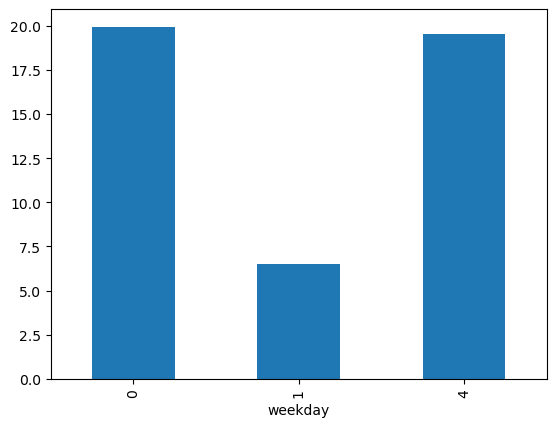

In [56]:
greentaxidf.total_amount.groupby(greentaxidf.weekday).mean().plot(kind='bar')

In [57]:
wd0=greentaxidf[greentaxidf.weekday==0]
wd1=greentaxidf[greentaxidf.weekday==1]
wd2=greentaxidf[greentaxidf.weekday==2]
wd3=greentaxidf[greentaxidf.weekday==3]
wd4=greentaxidf[greentaxidf.weekday==4]
wd5=greentaxidf[greentaxidf.weekday==5]
wd6=greentaxidf[greentaxidf.weekday==6]

In [58]:
from scipy.stats import f_oneway

In [59]:
f_oneway(wd0.total_amount,wd1.total_amount,wd2.total_amount,
        wd3.total_amount,wd4.total_amount,wd5.total_amount,
        wd6.total_amount)
# Since pvalue=1.7369676245639055e-06 is less than 0.05,
# Reject Null. Difference in means is statistically significant

C:\Users\RELIANCE\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3872: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [60]:
pd.crosstab(greentaxidf.weekday,greentaxidf.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
weekday,,,,,
0,31867,14159,191,44,2
1,1,1,0,0,0
4,18753,8540,135,25,0


In [61]:
from scipy.stats import chi2_contingency

In [62]:
chi2_contingency(pd.crosstab(greentaxidf.weekday,
                             greentaxidf.payment_type))
# Since p-value=0.11511 is greater than 0.05, Fail to Reject 
# Null.

(6.228347559832861,
 0.6216703574014997,
 8,
 array([[3.17680800e+04, 1.42457758e+04, 2.04586912e+02, 4.33021379e+01,
         1.25513443e+00],
        [1.37336878e+00, 6.15860441e-01, 8.84451559e-03, 1.87199870e-03,
         5.42608318e-05],
        [1.88515466e+04, 8.45360835e+03, 1.21404243e+02, 2.56959901e+01,
         7.44811308e-01]]))

In [63]:
greentaxidf.columns

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'weekday'],
      dtype='object')

In [64]:
objectcols=greentaxidf[['store_and_fwd_flag', 'RatecodeID',
                       'payment_type', 'trip_type','weekday']]

In [65]:
numericcols=greentaxidf.drop(['store_and_fwd_flag', 'RatecodeID',
                       'payment_type', 'trip_type','weekday'],
                            axis=1)

In [66]:
print(greentaxidf.shape)
print(objectcols.shape)
print(numericcols.shape)

(73718, 15)
(73718, 5)
(73718, 10)


In [67]:
objectcolsdummy=pd.get_dummies(objectcols,columns=['store_and_fwd_flag', 'RatecodeID',
                       'payment_type', 'trip_type','weekday'])

In [68]:
print(objectcolsdummy.shape)

(73718, 18)


In [69]:
numericcols.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,-0.008140,-0.020953,0.022470,0.079477,-0.006853,-0.012778,-0.010232,-0.017722,0.042872
trip_distance,-0.008140,1.000000,0.012262,-0.014962,-0.060035,0.011230,0.007765,0.002299,0.012258,-0.015484
fare_amount,-0.020953,0.012262,1.000000,-0.062303,-0.272656,0.367894,0.376367,0.058836,0.971591,0.029529
extra,0.022470,-0.014962,-0.062303,1.000000,0.247415,0.015246,-0.045126,0.060589,-0.017160,0.296072
mta_tax,0.079477,-0.060035,-0.272656,0.247415,1.000000,-0.229737,-0.112607,0.264013,-0.268623,0.229166
tip_amount,-0.006853,0.011230,0.367894,0.015246,-0.229737,1.000000,0.260029,0.029020,0.552500,0.125870
tolls_amount,-0.012778,0.007765,0.376367,-0.045126,-0.112607,0.260029,1.000000,-0.001788,0.459581,-0.059300
improvement_surcharge,-0.010232,0.002299,0.058836,0.060589,0.264013,0.029020,-0.001788,1.000000,0.067777,0.046147
total_amount,-0.017722,0.012258,0.971591,-0.017160,-0.268623,0.552500,0.459581,0.067777,1.000000,0.118610
congestion_surcharge,0.042872,-0.015484,0.029529,0.296072,0.229166,0.125870,-0.059300,0.046147,0.118610,1.000000


In [70]:
numericcols=numericcols.drop('fare_amount',axis=1)

In [71]:
numericcols.head()

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2.03,0.5,0.5,2.64,0.0,0.3,11.44,0.0
1,2.0,4.26,0.5,0.5,3.16,0.0,0.3,18.96,0.0
2,1.0,0.00,0.0,0.0,4.59,0.0,0.3,19.89,0.0
3,1.0,1.78,0.5,0.5,1.00,0.0,0.3,11.80,0.0
4,3.0,3.10,0.5,0.5,0.00,0.0,0.3,14.30,0.0


In [72]:
greentaxidf_clean=pd.concat([numericcols,objectcolsdummy],
                            axis=1)

In [73]:
y=greentaxidf_clean.total_amount
X=greentaxidf_clean.drop('total_amount',axis=1)

4.078440322859399
39.32226196054046


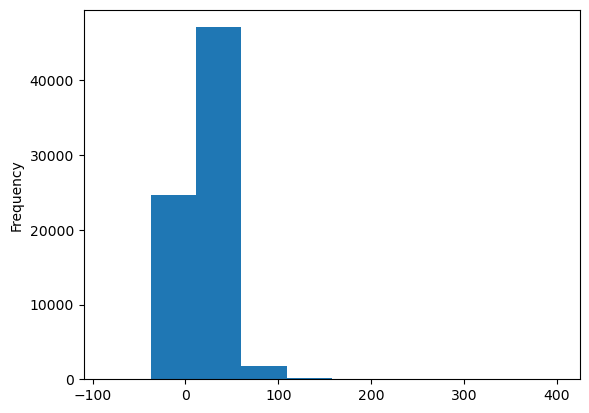

In [74]:
y.plot(kind='hist')
print(y.skew())
print(y.kurt())

<AxesSubplot:>

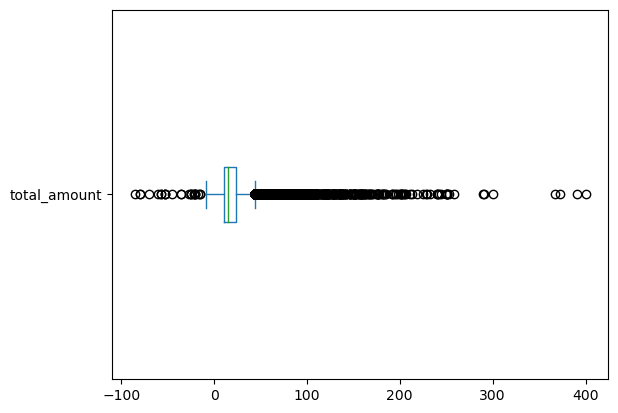

In [75]:
y.plot(kind='box',vert=False)

C:\Users\RELIANCE\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RELIANCE\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

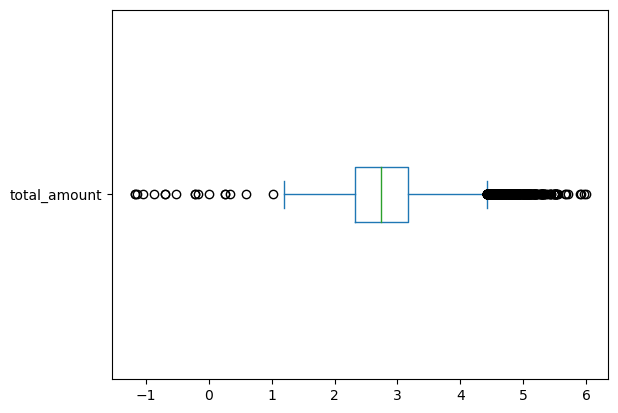

In [76]:
np.log(y).plot(kind='box',vert=False)

C:\Users\RELIANCE\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

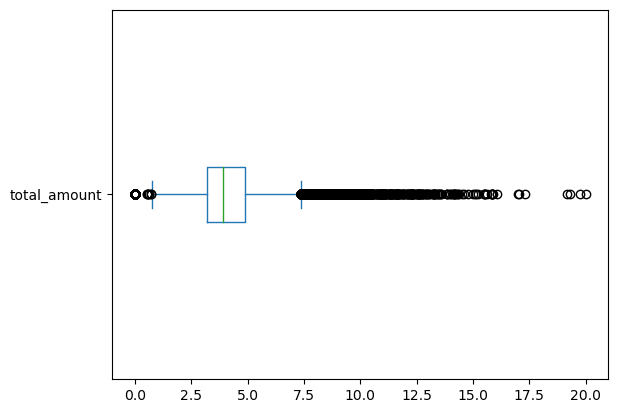

In [77]:
np.sqrt(y).plot(kind='box',vert=False)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg=LinearRegression()

In [80]:
regmodel=reg.fit(X,y)

In [81]:
regmodel.score(X,y)

0.4884214529797445

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
tree=DecisionTreeRegressor(max_depth=12)

In [84]:
treemodel=tree.fit(X,y)

In [85]:
treemodel.score(X,y)

0.882045818932841

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
cross_val_score(tree,X,y)

array([ 0.67828617,  0.71164791,  0.74801651,  0.77506808, -1.40978749])

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
RF=RandomForestRegressor(n_estimators=3000)

In [90]:
RFmodel=RF.fit(X,y)

In [91]:
RFmodel.score(X,y)

0.9356866212961819

In [ ]:
cross_val_score(RF,X,y)